In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix, precision_recall_curve


In [53]:
dataframe = pd.read_csv("../Preprocessing/preprocessdffixed.csv")

In [54]:
dataframe = dataframe.drop(['Unnamed: 0' ], axis=1)
dataframe

,User Rating,Review,Price,Year,Genre,Occurences,Total Stars,000,10,100,...,write,year,york,young,zelda,zhi,zinczenko,zone,zoo,zusak
0,0.8750,0.197178,0.067308,0.7,1.0,0.000000,0.193075,0.0,0.914439,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.8125,0.022949,0.201923,0.2,0.0,0.000000,0.021992,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.8750,0.215730,0.134615,0.9,1.0,0.000000,0.211241,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.8750,0.243577,0.048077,0.8,0.0,0.000000,0.238507,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.9375,0.086875,0.105769,1.0,1.0,0.000000,0.086891,1.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,0.7500,0.122124,0.134615,0.3,0.0,0.000000,0.114481,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
343,0.5625,0.014407,0.096154,0.1,1.0,0.000000,0.012571,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
344,0.9375,0.245866,0.076923,0.4,0.0,0.444444,0.245879,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
345,1.0000,0.106783,0.067308,1.0,0.0,0.000000,0.109032,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
dataframe.describe()

,User Rating,Review,Price,Year,Genre,Occurences,Total Stars,000,10,100,...,write,year,york,young,zelda,zhi,zinczenko,zone,zoo,zusak
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,...,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,0.817003,0.112169,0.119601,0.450432,0.547550,0.063721,0.107363,0.002882,0.011443,0.004541,...,0.002882,0.004588,0.005560,0.005265,0.002882,0.005447,0.005394,0.002882,0.002882,0.002882
std,0.141966,0.124180,0.095142,0.329860,0.498453,0.141970,0.117312,0.053683,0.097284,0.061866,...,0.053683,0.062307,0.073186,0.069562,0.053683,0.071770,0.071114,0.053683,0.053683,0.053683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.039252,0.067308,0.100000,0.000000,0.000000,0.037327,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.812500,0.074063,0.105769,0.400000,1.000000,0.000000,0.070742,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.937500,0.131497,0.144231,0.700000,1.000000,0.111111,0.125072,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
dataframe.loc[dataframe['Total Stars']>0.17, 'Total Stars'] = int(1)
dataframe.loc[dataframe['Total Stars']<=0.17, 'Total Stars'] = int(0)
X_total_stars = dataframe.drop('Total Stars', axis=1).values
y_total_stars = dataframe['Total Stars']
dataframe

,User Rating,Review,Price,Year,Genre,Occurences,Total Stars,000,10,100,...,write,year,york,young,zelda,zhi,zinczenko,zone,zoo,zusak
0,0.8750,0.197178,0.067308,0.7,1.0,0.000000,1.0,0.0,0.914439,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.8125,0.022949,0.201923,0.2,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.8750,0.215730,0.134615,0.9,1.0,0.000000,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.8750,0.243577,0.048077,0.8,0.0,0.000000,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.9375,0.086875,0.105769,1.0,1.0,0.000000,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,0.7500,0.122124,0.134615,0.3,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
343,0.5625,0.014407,0.096154,0.1,1.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
344,0.9375,0.245866,0.076923,0.4,0.0,0.444444,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
345,1.0000,0.106783,0.067308,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
X_to_split = dataframe.drop('Total Stars', axis=1).values
y_to_split = dataframe['Total Stars']
y_to_split

0      1.0
1      0.0
2      1.0
3      1.0
4      0.0
      ... 
342    0.0
343    0.0
344    1.0
345    0.0
346    0.0
Name: Total Stars, Length: 347, dtype: float64

In [58]:
X_train, X_test, y_train, y_test \
    = train_test_split(X_to_split, y_to_split)


Accuracy TRAIN
0.9807692307692307
Precision TRAIN
1.0
Recall TRAIN
0.8780487804878049
F1 Score TRAIN
0.9350649350649352
Accuracy TEST
0.6436781609195402
Precision TEST
0.26666666666666666
Recall TEST
0.16666666666666666
F1 Score TEST
0.2051282051282051


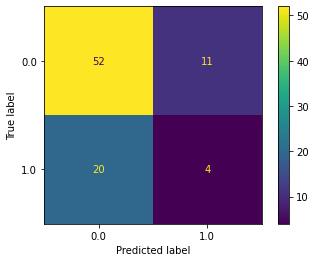

In [59]:
NB = MultinomialNB(alpha=1)
NB.fit(X_train,y_train)
print("Accuracy TRAIN")
print(NB.score(X_train, y_train))


y_pred = NB.predict(X_train)
print("Precision TRAIN")
print(precision_score(y_train, y_pred))
print("Recall TRAIN")
print(recall_score(y_train, y_pred))
print("F1 Score TRAIN")
print(f1_score(y_train, y_pred))
x = confusion_matrix(y_train, y_pred)
x

print("Accuracy TEST")
print(NB.score(X_test, y_test))
y_pred = NB.predict(X_test)
print("Precision TEST")
x = precision_score(y_test, y_pred)
print(x)
print("Recall TEST")
x = recall_score(y_test, y_pred)
print(x)
print("F1 Score TEST")
print(f1_score(y_test, y_pred))

plot_confusion_matrix(NB,X_test, y_test);
